In [14]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

t, k, mu, sigma, w, tau, z = symbols('t k mu sigma \\tilde\\Delta tau z')

exponential = Eq(Function('f')(t), exp(-k*t) * Heaviside(t, 1))
gauss = Eq(Function('g')(t), exp(-t*t / (2 * sigma * sigma)) / (sigma * sqrt(2 * pi)))

display(exponential)
display(gauss)

Eq(f(t), exp(-k*t)*Heaviside(t, 1))

Eq(g(t), sqrt(2)*exp(-t**2/(2*sigma**2))/(2*sqrt(pi)*sigma))

In [4]:
# convolution formula
Integral(Function('f')(tau) * Function('g')(t - tau), (tau, -oo, oo))

Integral(f(tau)*g(t - tau), (tau, -oo, oo))

In [5]:
# put our functions into it
conv_exp = Integral(exponential.rhs.subs(t, tau) * gauss.rhs.subs(t, t - tau), (tau, -oo, oo))
conv_exp

Integral(sqrt(2)*exp(-k*tau)*exp(-(t - tau)**2/(2*sigma**2))*Heaviside(tau, 1)/(2*sqrt(pi)*sigma), (tau, -oo, oo))

In [6]:
# integrate
conv = integrate(conv_exp.args[0], (tau, -oo, oo))
conv

Piecewise((sqrt(2)*(-sqrt(2)*pi*k*sigma*(1 - t/(k*sigma**2))*exp(k**2*sigma**2*(1 - t/(k*sigma**2))**2/2)*erf(sqrt(2)*k*sigma*(1 - t/(k*sigma**2))/2)/2 + sqrt(2)*pi*k*sigma*(1 - t/(k*sigma**2))*exp(k**2*sigma**2*(1 - t/(k*sigma**2))**2/2)/2)*exp(-t**2/(2*sigma**2))/(2*pi*k*sigma*(1 - t/(k*sigma**2))), (2*Abs(arg(sigma)) < pi/2) | ((2*Abs(arg(sigma)) <= pi/2) & (Abs(2*arg(k) + 2*arg(1 - t/(k*sigma**2))) < pi)) | ((2*Abs(arg(sigma)) < pi/2) & (Abs(2*arg(k) + 2*arg(1 - t/(k*sigma**2))) <= pi)) | ((2*Abs(arg(sigma)) < pi/2) & (Abs(2*arg(k) + 2*arg(1 - t/(k*sigma**2))) < pi))), (Integral(sqrt(2)*exp(-k*tau)*exp(-(t - tau)**2/(2*sigma**2))*Heaviside(tau, 1)/(2*sqrt(pi)*sigma), (tau, -oo, oo)), True))

In [7]:
piece = simplify(conv.args[0][0])
piece

(1 - erf(sqrt(2)*(k*sigma**2 - t)/(2*sigma)))*exp(k*(k*sigma**2/2 - t))/2

In [8]:
# substitute sigma with width
#  w = sigma * sqrt(2)
sim_piece = simplify(piece.subs(sigma, w / sqrt(2)))
Eq(conv_exp, sim_piece)

Eq(Integral(sqrt(2)*exp(-k*tau)*exp(-(t - tau)**2/(2*sigma**2))*Heaviside(tau, 1)/(2*sqrt(pi)*sigma), (tau, -oo, oo)), (1 - erf((\tilde\Delta**2*k - 2*t)/(2*\tilde\Delta)))*exp(k*(\tilde\Delta**2*k - 4*t)/4)/2)

In [21]:
print('Because')
display(Eq(1 - erf(z), erfc(z)))
print('So')
Eq(conv_exp, sim_piece.replace(erf, lambda x: 1 - erfc(x)))

Because


Eq(1 - erf(z), erfc(z))

So


Eq(Integral(sqrt(2)*exp(-k*tau)*exp(-(t - tau)**2/(2*sigma**2))*Heaviside(tau, 1)/(2*sqrt(pi)*sigma), (tau, -oo, oo)), exp(k*(\tilde\Delta**2*k - 4*t)/4)*erfc((\tilde\Delta**2*k - 2*t)/(2*\tilde\Delta))/2)

In [9]:
# get the function for fast expression evaluation
conv_fcn = lambdify([t, k, w], sim_piece)

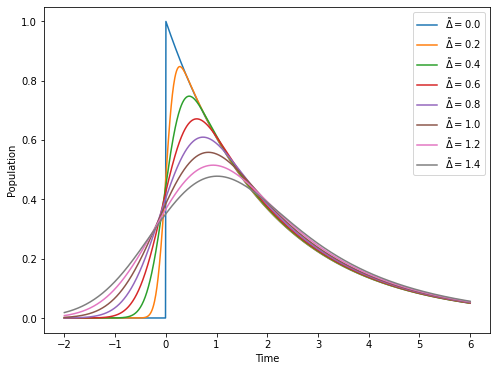

In [13]:
# plot the functions for various widths
t = np.linspace(-2, 6, 1000)
widths = np.arange(0.2, 1.6, 0.2)
k = 0.5

y = conv_fcn(t[:, None], k, widths[None, :])
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(t, np.exp(-k * t) * np.heaviside(t, 1))
plt.plot(t, y)
plt.legend([f'$\\tilde\\Delta = {w:.1f}$' for w in [0] + list(widths)])
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()